# Scikit-Time

"A unified framework for machine learning with time series."

Documentación: https://www.sktime.net/en/stable/

## 1. Sección de muestra hecha por Federico

In [1]:
import numpy as np
import pandas as pd
from sktime.utils.plotting import plot_series

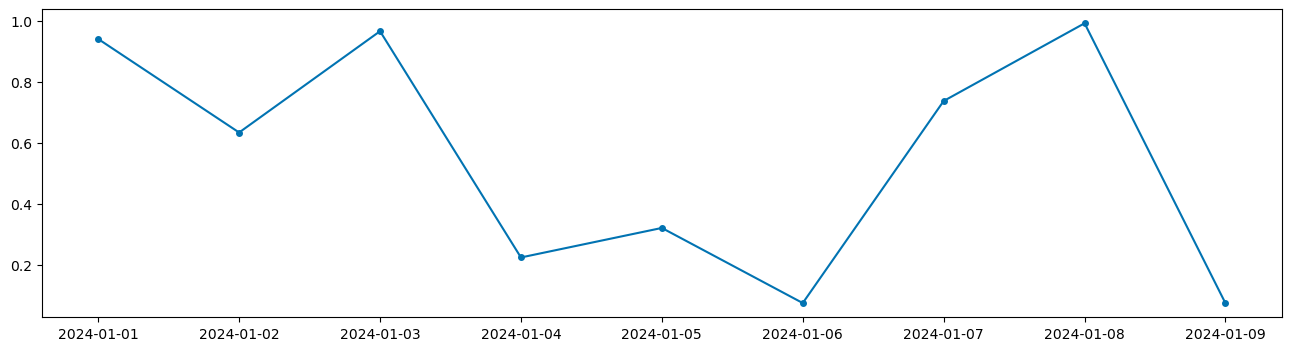

In [2]:
# Generar datos de serie temporal
tiempos = pd.date_range(start='2024-01-01', periods=9, freq='D')
valores = np.random.rand(9)  # 9 valores aleatorios

# Crear un DataFrame pandas y convertirlo en una serie de sktime
serie_temporal = pd.Series(valores, index=tiempos)

# Visualizar la serie temporal
plot_series(serie_temporal);

## 2. Sección de exploración personal

Explorando [forecasting](https://www.sktime.net/en/latest/examples/01_forecasting.html) desde la documentación...

Por cierto:

El **forecasting** (o **pronóstico**) es una técnica de análisis de datos que se utiliza para prever el comportamiento futuro de un evento o una serie de eventos basándose en los datos históricos y patrones identificados.

Fuente: [MSMK University](https://msmk.university/que-es-el-forecasting-msmk-university/)

In [1]:
import warnings

import numpy as np
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")

### Paso 1: Preparación de los datos

In [2]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

**NOTA:** La documentación usa un dataset de libro de texto, el _Box-Jenkins airline dataset_, que consiste en el número total mensual de pasajeros de vuelos internacionales, desde 1949 a 1960. Los valores están en miles.

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

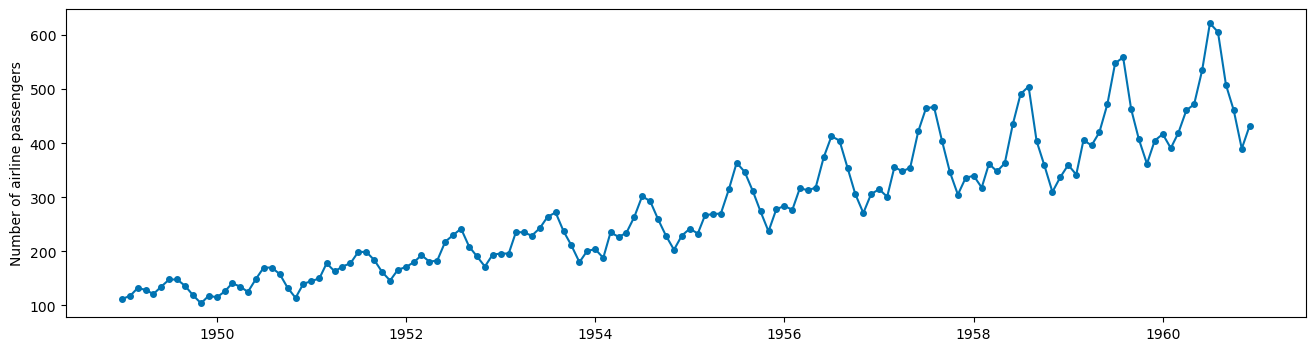

In [3]:
y = load_airline()

# plotting for visualization
plot_series(y)

In [4]:
y.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', length=144)

Cabe destacar que `sktime` usa `pandas` para representar series de datos temporales:

- Principalmente, uso de `pd.DataFrame` para series y secuencias de datos temporales. Las filas representan los índices temporales, las columnas representan las variables.

- `pd.Series` también puede ser usado para series y secuencias temporales univariadas.

- `numpy` arrays (1D and 2D) también pueden ser usados, pero se prefiere el uso de `pandas`.

En otras palabras, se asume que los datos están en formato `pd.DataFrame` o en `pd.Series`.

### Paso 2: Especificar el horizonte de forecasting

De acuerdo con la documentación, hay dos vías principales:

- Usando un `numpy.array` de enteros.

- Usando un objeto `ForecastingHorizon`.

Probemos con la segunda opción que parece hecha _ad hoc_.

In [5]:
from sktime.forecasting.base import ForecastingHorizon

In [6]:
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
)
fh

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

### Paso 3: Especificando el algoritmo de forecasting

Siguiendo el ejemplo de la documentación, se ha escogido el método de pronóstico ingenuo de predecir el último valor visto.

In [7]:
from sktime.forecasting.naive import NaiveForecaster

In [8]:
forecaster = NaiveForecaster(strategy="last")

### Paso 4: Ajustando el pronóstico a los datos vistos

In [9]:
forecaster.fit(y)

NaiveForecaster()

### Paso 5: Solicitando pronósticos

In [10]:
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

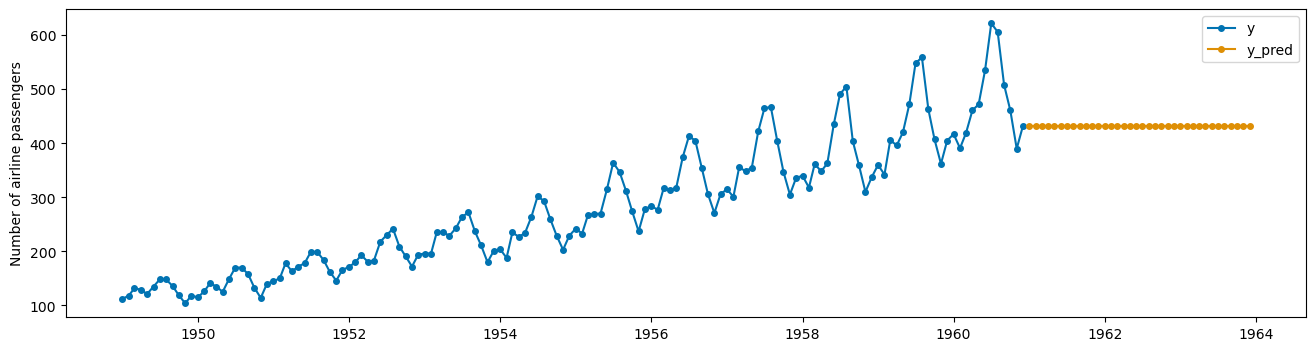

In [11]:
# plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

### Extra: El despliegue básico del flujo de trabajo en 3 celdas

In [12]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

In [13]:
# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

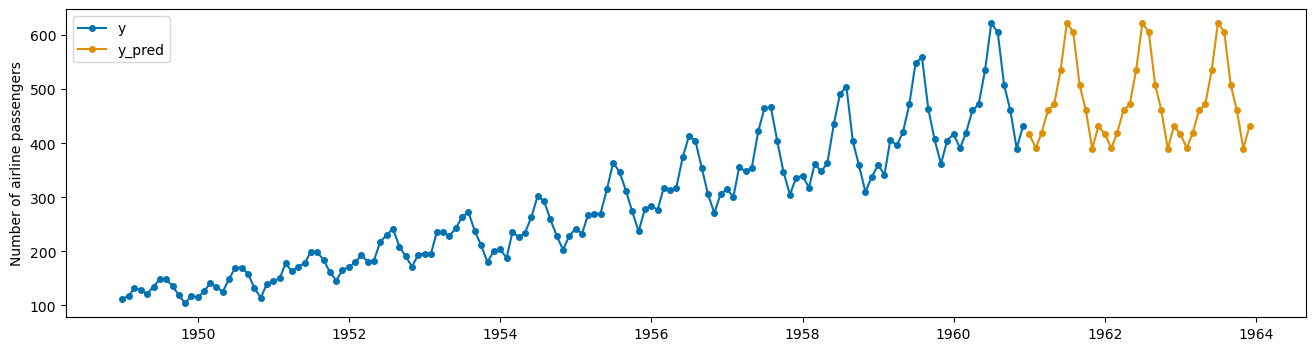

In [14]:
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])